# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('mall_customers.csv')
dataset_wide = dataset.iloc[ : , 1: ]
dataset_narrow_m = dataset.iloc[ : , -2:] # Mine variant
# dataset_narrow_l = dataset.iloc[ : , [3, 4]] # lector's variant
# X = dataset.iloc[ : , [3, 4]] # lector's variant

## Finding the optimal number of clusters using the elbow method

C:\Users\Oggy\.conda\envs\learning\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28, 181363.595959596, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.83934915659, 21850.16528258563, 19672.07284901432]
2 -> 1: -88617.68404040404
3 -> 2: -75015.2228974848
4 -> 3: -32668.584022622817
5 -> 4: -29231.333591554663
6 -> 5: -7214.640937223696
7 -> 6: -6974.157303424545
8 -> 7: -5247.817858128878
9 -> 8: -3161.674066570962
10 -> 9: -2178.09243357131


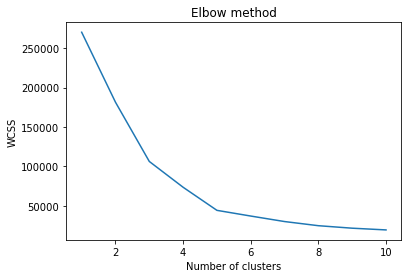

In [3]:
from sklearn.cluster import KMeans
wcss = []
for c in range(1, 11):
    kmeans = KMeans(n_clusters = c, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset_narrow_m)
    wcss.append(kmeans.inertia_)

print(wcss)
# print(wcss[0])
for i in range (1, len(wcss)):
    diff = wcss[i] - wcss[i - 1]
    print(f'{i + 1} -> {i}: {diff}')

plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the model on the dataset

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset_narrow_m)

## Visualising the clusters

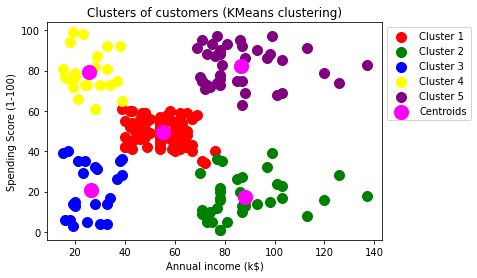

In [6]:
plt.scatter(dataset_narrow_m.iloc[y_kmeans == 0, 0], dataset_narrow_m.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(dataset_narrow_m.iloc[y_kmeans == 1, 0], dataset_narrow_m.iloc[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(dataset_narrow_m.iloc[y_kmeans == 2, 0], dataset_narrow_m.iloc[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(dataset_narrow_m.iloc[y_kmeans == 3, 0], dataset_narrow_m.iloc[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(dataset_narrow_m.iloc[y_kmeans == 4, 0], dataset_narrow_m.iloc[y_kmeans == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'magenta', label = 'Centroids')
plt.title('Clusters of customers (KMeans clustering)')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1) 
plt.show()